<a href="https://colab.research.google.com/github/st3082group10/Abalone_Age_Prediction/blob/main/Abalone_descriptive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Abalone Dataset
abalone = pd.read_csv('G:/University of Colombo/3rd Year/2nd Semester/ST 3082/Project 2/abalone.csv')

# Remove rows where height is equal to 0
abalone = abalone[(abalone['Height'] > 0) & (abalone['Height'] < 1)]

train, test = train_test_split(abalone, test_size=0.2, random_state=123) 

In [ ]:
train.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
2596,F,0.600,0.460,0.145,0.9325,0.3985,0.2245,0.2480,8
2745,I,0.485,0.380,0.125,0.5215,0.2215,0.1180,0.1600,8
853,M,0.570,0.455,0.150,0.9520,0.3895,0.2155,0.2745,9
1808,F,0.635,0.475,0.150,1.1845,0.5330,0.3070,0.2910,10
3354,F,0.455,0.360,0.110,0.4385,0.2060,0.0980,0.1250,10


In [ ]:
train.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000,3339.00000,3339.000000
mean,0.525256,0.408705,0.139721,0.834565,0.361903,0.181850,0.24045,9.978137
std,0.120043,0.098987,0.038666,0.490367,0.221815,0.109631,0.13956,3.262227
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.00150,1.000000
25%,0.450000,0.350000,0.115000,0.445750,0.188250,0.094500,0.13000,8.000000
50%,0.545000,0.425000,0.145000,0.811000,0.341000,0.171500,0.23500,10.000000
75%,0.615000,0.480000,0.165000,1.161250,0.506500,0.256000,0.33000,11.000000
max,0.815000,0.650000,0.250000,2.657000,1.488000,0.641500,1.00500,29.000000


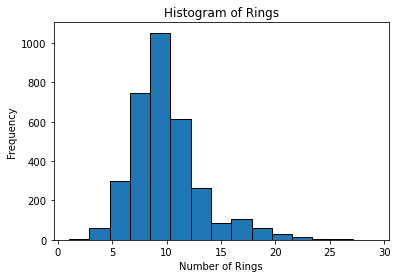

In [ ]:
# Plot the histogram
plt.hist(train['Rings'], bins=15, edgecolor='black')

# Add labels and title
plt.xlabel('Number of Rings')
plt.ylabel('Frequency')
plt.title('Histogram of Rings')

# Display the plot
plt.show()

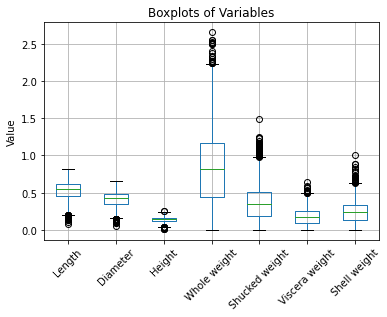

In [ ]:
df = train.drop('Rings',axis=1)

# Create a figure and axes
fig, ax = plt.subplots()

df.head()
# Plot boxplots for all numeric variables
df.boxplot(ax=ax)

# Set the title and labels
ax.set_title('Boxplots of Variables')
ax.set_ylabel('Value')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

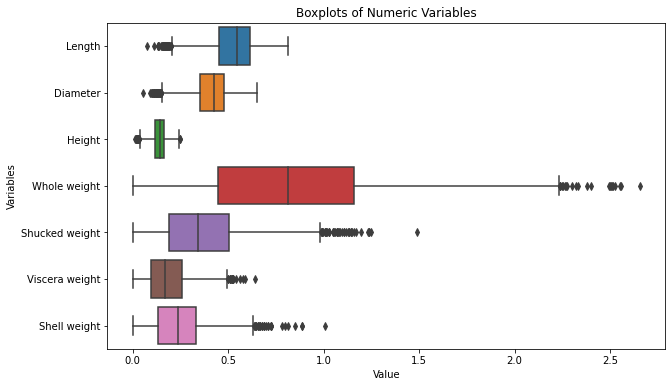

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient='h')
plt.title('Boxplots of Numeric Variables')
plt.xlabel('Value')
plt.ylabel('Variables')

# Show the plot
plt.show()

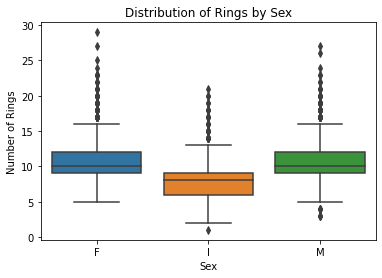

In [ ]:
# Create a box plot or violin plot
sns.boxplot(x='Sex', y='Rings', data=train)

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Number of Rings')
plt.title('Distribution of Rings by Sex')

# Display the plot
plt.show()

<ipython-input-60-8c7efede7ee6>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


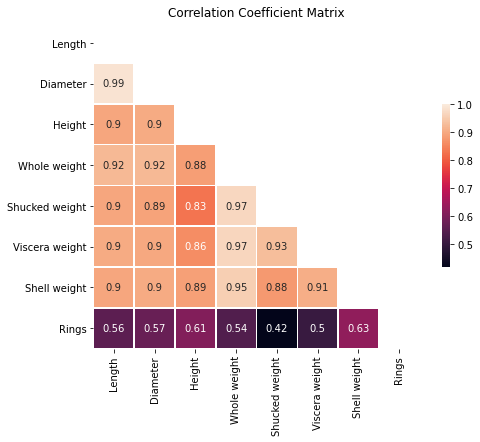

In [ ]:
# Calculate the correlation matrix
corr = train.corr()

# Create a heatmap

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, vmax=1,square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True)

# Add title
plt.title('Correlation Coefficient Matrix')

# Display the plot
plt.show()

In [ ]:
from scipy.stats import kruskal

# Separate the rings variable by sex categories
rings_male = train[train['Sex'] == 'M']['Rings']
rings_female = train[train['Sex'] == 'F']['Rings']
rings_infant = train[train['Sex'] == 'I']['Rings']

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(rings_male, rings_female, rings_infant)
print("Kruskal-Wallis statistic:", statistic)
print("p-value:", p_value)

Kruskal-Wallis statistic: 879.4867548085496
p-value: 1.0516657730268582e-191


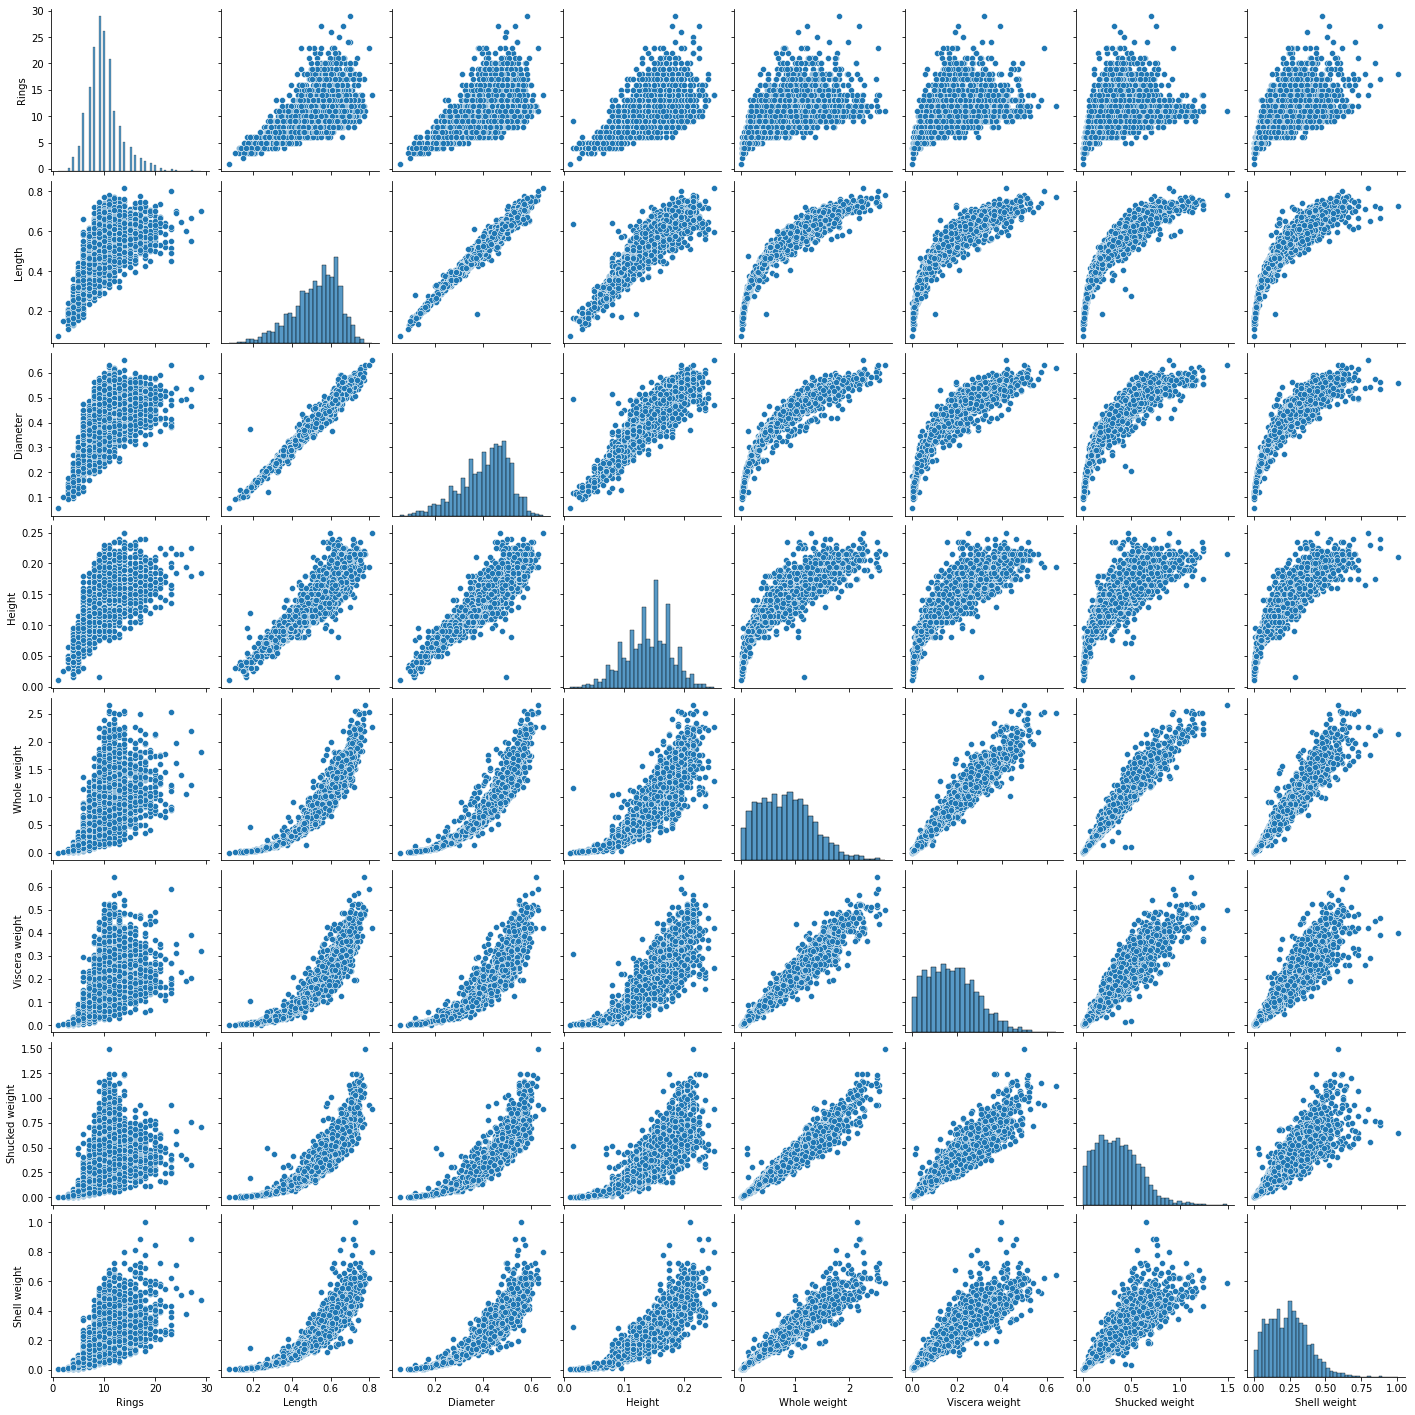

In [ ]:
sns.pairplot(train, vars = ['Rings', 'Length', 'Diameter', 'Height', 'Whole weight','Viscera weight','Shucked weight','Shell weight']);